In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
#Loading data
iris = datasets.load_iris()

In [2]:
X=iris.data
y = iris.target

# Plot of the sepal-length vs sepal-width
# 0-Setosa,1-Versicolour,2-Virginica

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


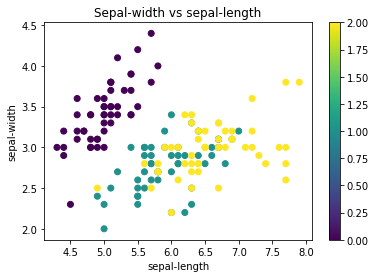

In [3]:
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap='viridis')
plt.subplot(1, 1, 1)
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')
plt.title('Sepal-width vs sepal-length')
plt.colorbar()
plt.show()


# Plot of the petal-length vs petal-width
# 0-Setosa,1-Versicolour,2-Virginica

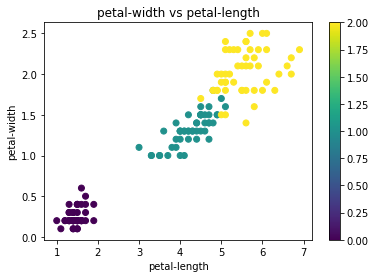

In [4]:
plt.scatter(x=X[:,2],y=X[:,3],c=y,cmap='viridis')
plt.xlabel('petal-length')
plt.ylabel('petal-width')
plt.title('petal-width vs petal-length')
plt.colorbar()
plt.show()

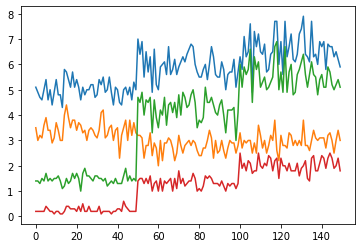

In [5]:
plt.plot(X)#we will get some random graph because the data as not clusters 

In [6]:
#Let's create only one cluster without iteration so that we will get the max inertia because the datapoints are not close to the
#centroid.

In [7]:
kmeans = KMeans(n_clusters = 1, init = 'k-means++')
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
kmeans.inertia_

681.3706

#  Lets plot a elbow graph
### Elbow graph gives the no.of clusters suitable for the data.

Text(0, 0.5, 'Inertia')

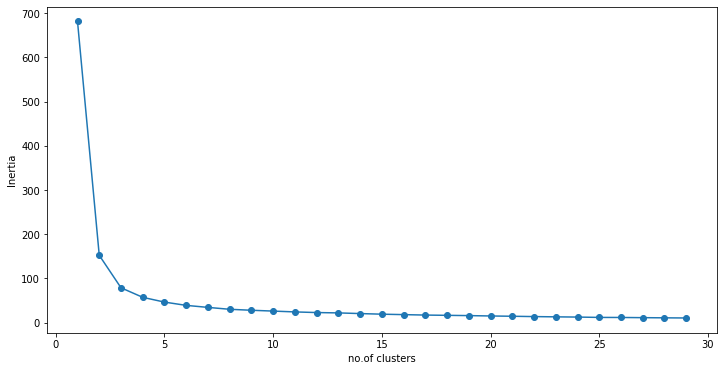

In [9]:
SSE = []#creating a list to store the inertia of every iteration the data while all centroids. 
for i in range(1,30):
    kmeans = KMeans(n_jobs = -1, n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 32)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

#convering the no.of clusters and the inertia into the dataframe to plot the elbow graph

df = pd.DataFrame({'cluster':range(1,30), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(df['cluster'],df['SSE'],marker='o')
plt.xlabel('no.of clusters')
plt.ylabel('Inertia')

In [10]:
#From the above elbow graph the clusters are 3.
#if we assign the n_clusters is 3.we will get low inertia and good clusters.
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 32)
kmeans.fit(X)
print(kmeans.inertia_)

78.85144142614601


#### Before creating 3 clusters with the data the inertia is 681.3706,After creating 3 clusters with the data the inertia is 78.85144142614601.
#### Inertia is decreased by creating the clusters according to the elbow graph.

In [11]:
pred = kmeans.predict(X)
frame = pd.DataFrame(X)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    62
1    50
0    38
Name: cluster, dtype: int64

# conclusion:
# The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid.
#### 1st centriod has 38 values
#### 2nd centriod has 50 values
#### 3rd centriod has 62 values